In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from fancyimpute import KNN  
from scipy.stats import chi2_contingency

C:\Users\Ajay\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.chdir("E:\Edwisor_project\Python")

In [3]:
os.getcwd()

'E:\\Edwisor_project\\Python'

In [4]:
data = pd.read_csv("day.csv")

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#check for null
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
data.drop(['instant','dteday'],axis=1,inplace=True)

In [11]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Data visualization

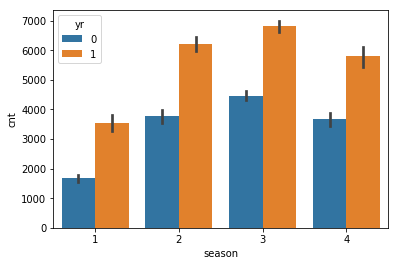

In [12]:
%matplotlib inline

#sns.barplot(x='season',y='cnt',hue='mnth',data=data,estimator=np.std)
sns.barplot(x='season',y='cnt',hue ='yr',data=data)

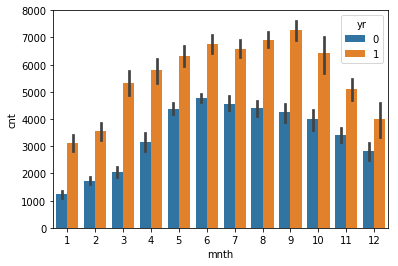

In [13]:
sns.barplot(x='mnth',y='cnt',data=data,hue='yr')

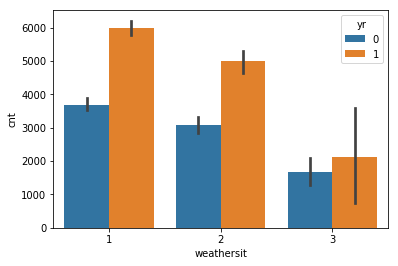

In [14]:
sns.barplot(x='weathersit',y='cnt',data=data,hue='yr')

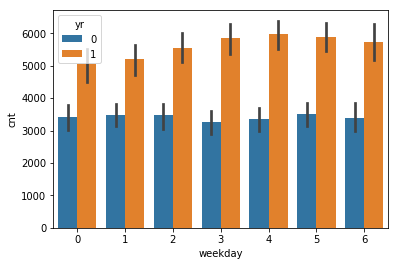

In [15]:
sns.barplot(x='weekday',y='cnt',data=data,hue='yr')

In [16]:
#sns.countplot(x='',data=data)

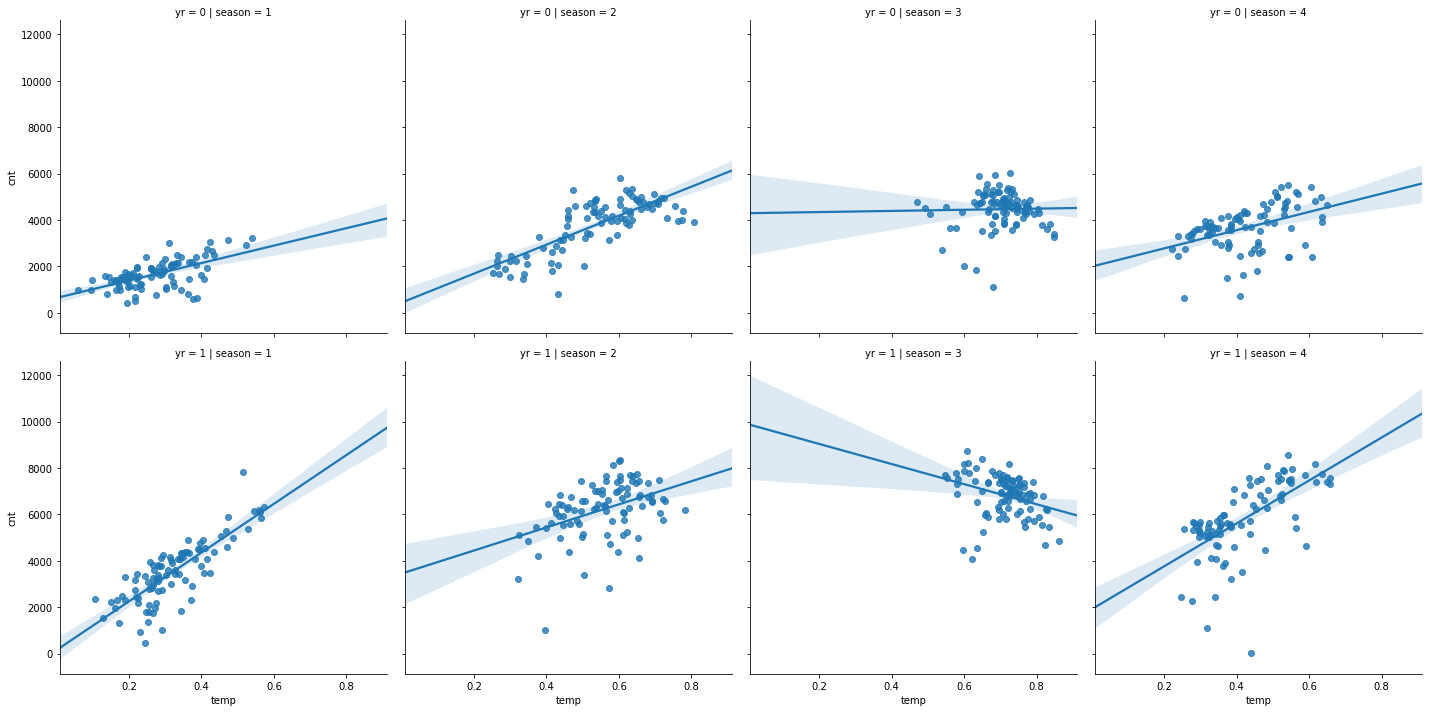

In [17]:
sns.lmplot(x='temp',y='cnt',data=data,col = 'season',row = 'yr')

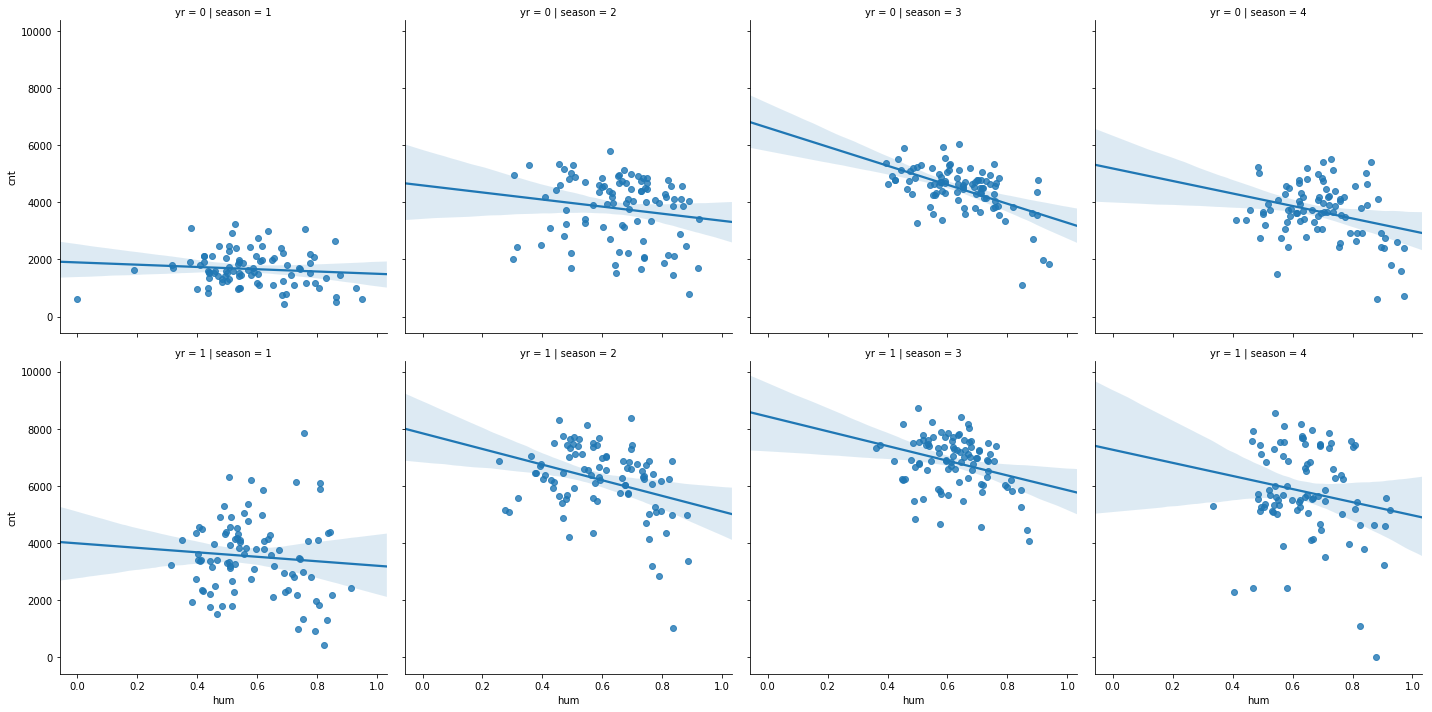

In [18]:
sns.lmplot(x='hum',y='cnt',data=data,col = 'season',row = 'yr')

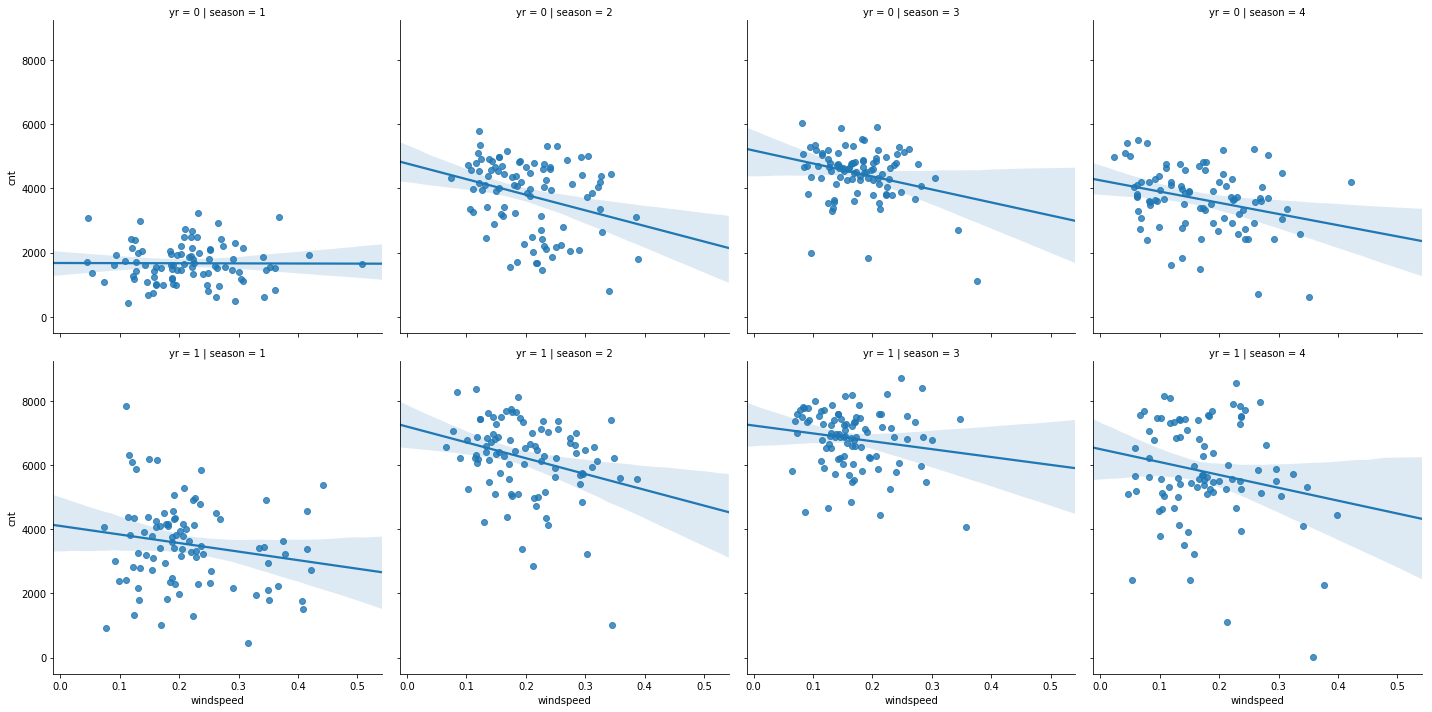

In [19]:
sns.lmplot(x='windspeed',y='cnt',data=data,col = 'season',row = 'yr')

In [20]:
#casual and registered are dependent variables, so remove them from model development--> casual + registered => cnt
data.drop(['casual','registered'],axis=1,inplace=True)

# Outlier analysis

In [21]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [22]:
#df = data.copy()

In [23]:
#data = df.copy()

In [24]:
cnames = ["temp","atemp","hum","windspeed","cnt"]

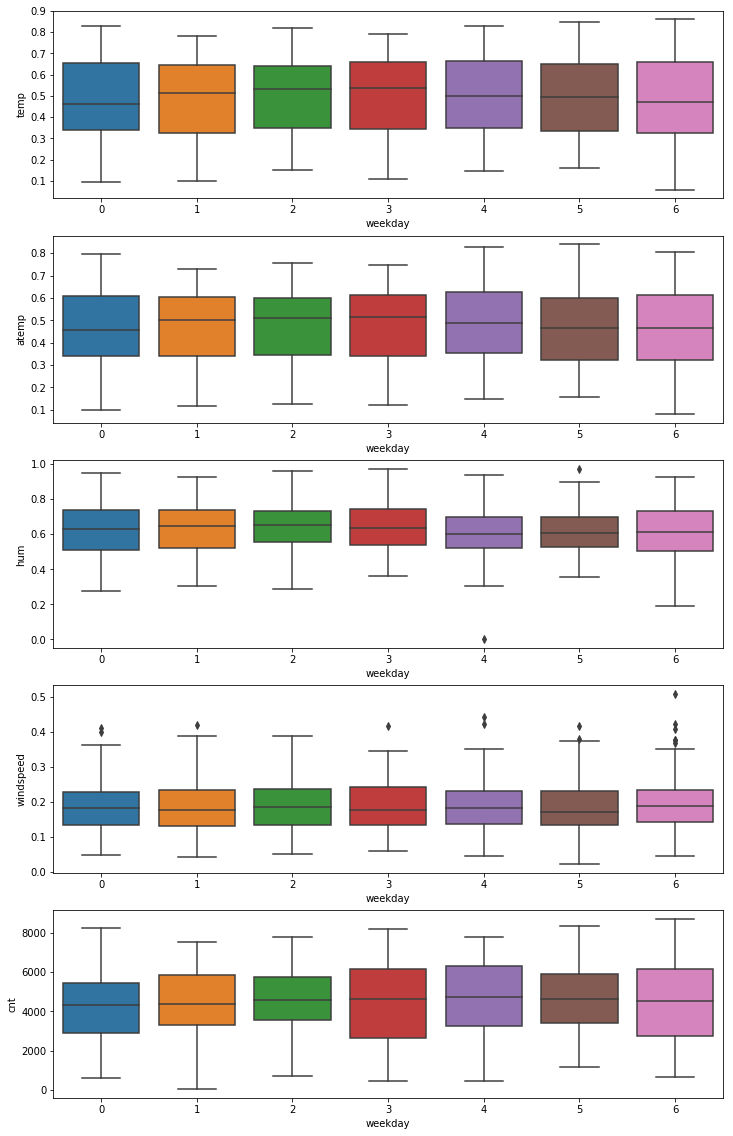

In [25]:
fig,ax = plt.subplots(5,figsize = (12,20))
for i in range(0,len(cnames)):
    sns.boxplot(y=cnames[i],x="weekday",data=data,ax=ax[i])


In [26]:
#Detect and delete outliers from data
for i in cnames:
    q75, q25 = np.percentile(data[i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)

    #Replace with NA
    data.loc[data[i] < min,i] = np.nan
    data.loc[data[i] > max,i] = np.nan


In [27]:
#Calculate missing value
missing_val = pd.DataFrame(data.isnull().sum())

#Impute with KNN
data = pd.DataFrame(KNN(k = 3).fit_transform(data), columns = data.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.178
Imputing row 101/731 with 0 missing, elapsed time: 0.180
Imputing row 201/731 with 0 missing, elapsed time: 0.180
Imputing row 301/731 with 0 missing, elapsed time: 0.181
Imputing row 401/731 with 0 missing, elapsed time: 0.182
Imputing row 501/731 with 0 missing, elapsed time: 0.183
Imputing row 601/731 with 0 missing, elapsed time: 0.184
Imputing row 701/731 with 0 missing, elapsed time: 0.185


# Feature selection

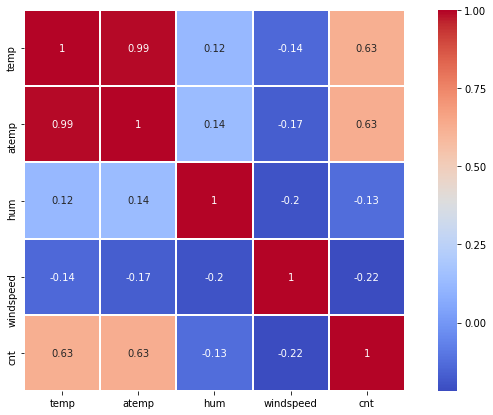

In [28]:
data_corr = data.loc[:,cnames]

#Set the width and height of the plot
f, ax = plt.subplots(figsize=(12, 7))

#Generate correlation matrix
corr = data_corr.corr()

#Plot using seaborn library
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='coolwarm',square = True,linewidths = 1,ax=ax,annot =True)

In [29]:
cat_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
#loop for chi square values
for i in cat_names:
    for j in cat_names:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(data[i], data[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependants")


season and mnth are dependants
season and weathersit are dependants
mnth and season are dependants
mnth and weathersit are dependants
holiday and weekday are dependants
holiday and workingday are dependants
weekday and holiday are dependants
weekday and workingday are dependants
workingday and holiday are dependants
workingday and weekday are dependants
weathersit and season are dependants
weathersit and mnth are dependants


In [30]:
#Drop columns
data.drop(['atemp','workingday'],axis=1,inplace=True)

In [31]:
data.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,6.0,2.0,0.344167,0.805833,0.160446,985.0
1,1.0,0.0,1.0,0.0,0.0,2.0,0.363478,0.696087,0.248539,801.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.196364,0.437273,0.248309,1349.0
3,1.0,0.0,1.0,0.0,2.0,1.0,0.200000,0.590435,0.160296,1562.0
4,1.0,0.0,1.0,0.0,3.0,1.0,0.226957,0.436957,0.186900,1600.0


In [32]:
data.shape

(731, 10)

# Sampling


In [33]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
data.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,6.0,2.0,0.344167,0.805833,0.160446,985.0
1,1.0,0.0,1.0,0.0,0.0,2.0,0.363478,0.696087,0.248539,801.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.196364,0.437273,0.248309,1349.0
3,1.0,0.0,1.0,0.0,2.0,1.0,0.200000,0.590435,0.160296,1562.0
4,1.0,0.0,1.0,0.0,3.0,1.0,0.226957,0.436957,0.186900,1600.0


In [35]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

In [36]:
#Divide data into train and test
X = data.values[:, 0:9]
Y = data.values[:,9]
#X= data[['season', 'yr', 'mnth', 'holiday', 'weekday','weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered']]
#Y = data['cnt']

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

# Model

## Linear regression

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
model.coef_

array([  505.94226526,  2035.02185369,   -42.34734052,  -688.76416136,
          71.96401179,  -576.44897975,  5338.16768545, -1218.61454437,
       -2579.27542556])

In [40]:
pred_LR = model.predict(x_test)

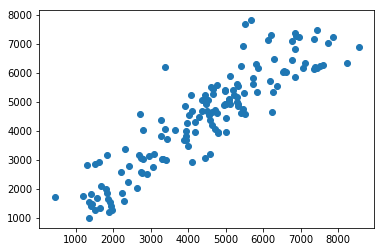

In [41]:
plt.scatter(y_test,pred_LR)

C:\Users\Ajay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


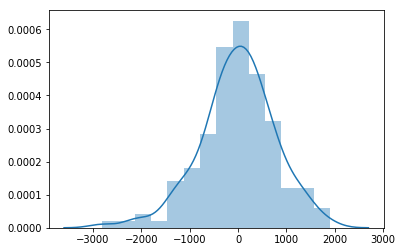

In [42]:
sns.distplot((y_test-pred_LR))

In [43]:
def mape(y_test,pred):
    return np.mean(np.abs((y_test-pred)/y_test))

In [44]:
rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(pred_LR)),2)))
rms

778.23731006491

In [45]:
metrics.mean_absolute_error(y_test,pred_LR) #mas

592.5548403931073

In [46]:
metrics.mean_squared_error(y_test,pred_LR) #mse

605653.310777067

In [47]:
np.sqrt(metrics.mean_squared_error(y_test,pred_LR)) #rms

778.23731006491

In [48]:
metrics.explained_variance_score(y_test,pred_LR)

0.8189016258544402

In [62]:
#mape = np.mean(np.abs((np.array(y_test) - np.array(pred_LR))/np.array(y_test)))
#mape
mape(y_test,pred_LR)

0.17642232332006924

## Random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [51]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
pred_RF = model.predict(x_test)

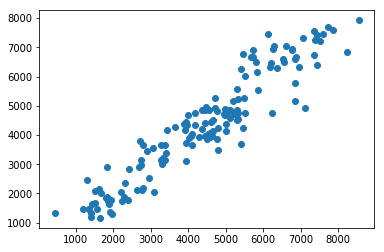

In [53]:
plt.scatter(y_test,pred_RF)

C:\Users\Ajay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


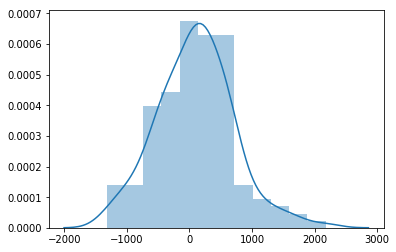

In [54]:
sns.distplot((y_test-pred_RF))

In [55]:
rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(pred_RF)),2)))
rms

618.493931250095

In [56]:
metrics.mean_absolute_error(y_test,pred_RF) #mas

481.18367346938777

In [57]:
np.sqrt(metrics.mean_squared_error(y_test,pred_RF)) #rms

618.493931250095

In [58]:
metrics.explained_variance_score(y_test,pred_RF)

0.8882441827812955

In [59]:
#mape = np.mean(np.abs((np.array(y_test) - np.array(pred))/np.array(y_test)))
#mape
mape(y_test,pred_RF)

0.13615404236163375

In [60]:
np.mean(np.abs((np.array(y_test) - np.array(pred_RF))/np.array(y_test)))

0.13615404236163375

# Sample input and output to excel file

In [66]:
#pd.DataFrame([y_test,pred_LR,pred_RF])
#pd.DataFrame
data = {'True values': y_test, 'Linear regression pred': pred_LR,'Random Forest pred': pred_RF}
sampleoutput = pd.DataFrame(data)

In [68]:
sampleoutput.to_csv("predicted_values.csv")

In [72]:
pd.DataFrame(x_test,columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'hum', 'windspeed']).to_csv("test_data.csv")